# Overview
This is our teams first attempt to explore the MTA Data!!

-  Stations with maximum traffic 
    - Traffic = Entries + Exit
-  Aggregated Traffic by Month for all stations
-  Aggregate data by time across stations
-  Office Locations by Stations
-  Explore data for 2 years
-  Cleaning Data
    -  See if there any nulls
    -  See if the station names have errors

In [1]:
import pandas as pd
import numpy as np
import math


In [2]:
!ls

MTA Data Analysis.ipynb     turnstile_190323.txt
turnstile_190316.txt        turnstile_190330.txt
turnstile_190316.txt_backup


In [3]:
mta_data = pd.read_csv("turnstile_190316.txt")

## Exploring the Data

The next steps we will explore the data to get a better understanding of the data

In [4]:
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/09/2019,03:00:00,REGULAR,6972000,2365115
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/09/2019,07:00:00,REGULAR,6972010,2365118
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/09/2019,11:00:00,REGULAR,6972049,2365173
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/09/2019,15:00:00,REGULAR,6972214,2365204
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/09/2019,19:00:00,REGULAR,6972474,2365272


In [5]:
stations = mta_data["STATION"].unique()

In [6]:
len(stations)

378

### Group by


In [12]:
mta_entries_exit_by_station = mta_data.groupby(['STATION'])[["ENTRIES","EXITS"]].agg('sum')

In [8]:
list(mta_data)

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS']

In [13]:
mta_entries_exit_by_station.describe()

,ENTRIES,EXITS
count,3.780000e+02,3.780000e+02
mean,2.164860e+10,1.784142e+10
std,4.734531e+10,4.459637e+10
min,6.933379e+06,3.669830e+05
25%,6.422760e+08,3.984626e+08
50%,1.936064e+09,1.049929e+09
75%,1.254393e+10,5.691632e+09
max,3.194425e+11,3.007405e+11


In [21]:
mta_entries_exit_by_station.sort_values(by="ENTRIES", ascending=False).head(10)

,ENTRIES,EXITS
STATION,,
42 ST-PORT AUTH,319442543428,260852172450
23 ST,276842908392,300740455092
TIMES SQ-42 ST,243835528033,189273870029
125 ST,225858292973,139038185890
3 AV-149 ST,212234177599,139940617053
CHAMBERS ST,210799996460,184406028749
104 ST,198786598121,144675572256
34 ST-HERALD SQ,191174770234,239507388853
14 ST,190856648241,134468390120


In [20]:
mta_entries_exit_by_station.sort_values(by="EXITS", ascending=False).head(10)

,ENTRIES,EXITS
STATION,,
23 ST,276842908392,300740455092
42 ST-PORT AUTH,319442543428,260852172450
72 ST,174989346498,239653396508
34 ST-HERALD SQ,191174770234,239507388853
CANAL ST,167859476293,226609392969
ELMHURST AV,131135673791,190266403148
TIMES SQ-42 ST,243835528033,189273870029
FULTON ST,183220956452,186274878137
CHAMBERS ST,210799996460,184406028749


In [23]:
mta_data['TOTAL'] = mta_data['ENTRIES'] + mta_data['EXITS']

In [24]:
mta_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/09/2019,03:00:00,REGULAR,6972000,2365115,9337115
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/09/2019,07:00:00,REGULAR,6972010,2365118,9337128
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/09/2019,11:00:00,REGULAR,6972049,2365173,9337222
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/09/2019,15:00:00,REGULAR,6972214,2365204,9337418
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/09/2019,19:00:00,REGULAR,6972474,2365272,9337746
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/09/2019,23:00:00,REGULAR,6972662,2365296,9337958
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2019,04:00:00,REGULAR,6972693,2365301,9337994
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2019,08:00:00,REGULAR,6972704,2365316,9338020
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2019,12:00:00,REGULAR,6972757,2365355,9338112
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/10/2019,16:00:00,REGULAR,6972878,2365376,9338254


In [50]:
mta_total_by_station = mta_data.groupby(['STATION'], as_index=False)[["TOTAL"]].agg('sum')

In [56]:
mta_top_10_stations = mta_total_by_station.sort_values(by="TOTAL", ascending=False).head(10)

## Graphing

This is to graph the data

* !pip install seaborn

In [52]:
import matplotlib as plt

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [54]:
mta_total_by_station

,STATION,TOTAL
0,1 AV,119858482440
1,103 ST,34580113643
2,103 ST-CORONA,5922251361
3,104 ST,343462170377
4,110 ST,3141086026
5,111 ST,6636939449
6,116 ST,34751890371
7,116 ST-COLUMBIA,62470857871
8,121 ST,106772567223
9,125 ST,364896478863


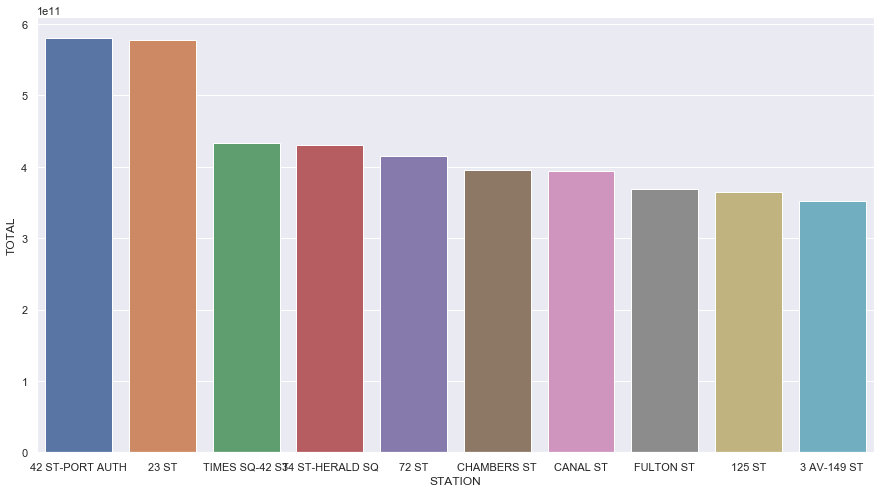

In [58]:
plt.figure(figsize=(15,8))
sns.barplot('STATION', 'TOTAL', data=mta_top_10_stations)

In [59]:
mta_top_10_stations

,STATION,TOTAL
68,42 ST-PORT AUTH,580294715878
46,23 ST,577583363484
352,TIMES SQ-42 ST,433109398062
59,34 ST-HERALD SQ,430682159087
97,72 ST,414642743006
180,CHAMBERS ST,395206025209
173,CANAL ST,394468869262
226,FULTON ST,369495834589
9,125 ST,364896478863
55,3 AV-149 ST,352174794652


In [60]:
!pip install requests BeautifulSoup4

    100% |████████████████████████████████| 102kB 2.2MB/s a 0:00:01
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
